In [ ]:
import networkx as nx
import pylab as plt
import pandas as pd
import argparse
import random
import numpy as np
import time

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's Import the differents Graphs

In [ ]:
G20 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph21.gml')

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
G35 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph35.gml')

## We Can test with three topologies either G20 or G25, G30

Function to Compute the Energy Consumption

\begin{equation}
  E_{Tx} = 
   k \times E_{elec} + k \times d^2 \times E_{fs} \qquad if \qquad  d< d_0\\
\end{equation}

\begin{equation}
  E_{Tx} =
   k \times E_{elec} + k \times d^4 \times E_{mp} \qquad if \qquad  d> d_0\\
\end{equation}


\begin{equation}
  E_{Rx} = k \times E_{elec} 
\end{equation}


In [ ]:
k = 4000  # k represent the number of bytes actually it is 500 bytes
Eelec = 50*10**(-9)  #  Eelec represents the electronic energy consumption (50nJ/bit)
Efs = 10*10**(-12)  # Eamp represents the Transmit amplifier (10pJ/bit/m^2)
Emp = 0.0013*10**(-12)  # Eamp represents the Transmit amplifier (0.0013pJ/bit/m^4)
d0 = 87

ERex = k*Eelec  # ERex represents the energy required for receiving data



def ETx(d):
    if d < d0:
        return k*Eelec + k*d**2*Efs
    else:
        return k*Eelec + k*d**4*Emp



#### Energy Consumption with A star Algorithm

In [ ]:
def AstarEnergy(Graph):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    t = []
    ListeEnergy = []
    start = time.time()
    for k in range(1000):

        S = random.choice(activenodes)
        liste = nx.astar_path(Graph, S, D, weight = 'weight' ) 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']) + ERex)
            Energysum = sum(Energy)

        ListeEnergy.append(Energysum)
        r = time.time() - start
        t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    final = time.time() - start
    return sum(ListeEnergy) , final, t, ListeEnergy, np.mean(ListeEnergy), np.std(ListeEnergy), (np.std(ListeEnergy)/np.mean(ListeEnergy))*100           

In [ ]:
G20 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph20.gml')

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
G35 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph35.gml')

In [ ]:
Astar20E = AstarEnergy(G20)

#### Energy consumption with Dijstra Algorithm

In [ ]:
def DijstraEnergy(Graph):
    list_nodes = list(Graph.nodes())
    activenodes = list_nodes[1:]
    random.seed(237)
    #S = listnodes[1]
    D = list_nodes[0]
    # This list contains the sum of the transmission energy in all the possible paths
    Ex = []
    t = []
    ListeEnergy = []
    start = time.time()
    for k in range(1000):

        S = random.choice(activenodes)
        liste = nx.single_source_dijkstra(Graph, S, D, weight='weight')[1] 
        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste)):
            if i == 0:
                Graph.nodes[liste[i]]["Energy"] -= ETx(Graph[liste[i]][liste[i + 1]]['weight'])
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight'])) 
            elif i!=0 and i!= len(liste) - 1:
                Graph.nodes[liste[i]]["Energy"] = Graph.nodes[liste[i]]["Energy"] - ETx(Graph[liste[i]][liste[i + 1]]['weight']) - ERex 
                Energy.append(ETx(Graph[liste[i]][liste[i + 1]]['weight']) + ERex)
            Energysum = sum(Energy)

        ListeEnergy.append(Energysum)
        r = time.time() - start
        t.append(r) 
        #Ex.append(ListeEnergy)

        #plt.plot(ListeEnergy)
        #plt.show()
    final = time.time() - start
    return sum(ListeEnergy), final, t, ListeEnergy, np.mean(ListeEnergy), np.std(ListeEnergy), (np.std(ListeEnergy)/np.mean(ListeEnergy))*100           

In [ ]:
G20 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph20.gml')

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
G35 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph35.gml')

In [ ]:
Dijstra20E = DijstraEnergy(G20)

#### Energy Consumption with RLDPP

In [ ]:
def compute(Graph, liste):
    ListeEnergy = [] # This list contains the sum of the transmission energy in all the possible paths 
    # l = []
    # for j in liste: # j will go through all the length of our liste of possible paths
    #   if deadNodes(Graph,j) is not None:
    #     l.append(deadNodes(Graph,j))
        
    # liste = [i for i in liste if isFeasible(Graph,i)]### all possible paths according to the energy able to share the information in the network



    for j in range(len(liste)): # j will go through all the length of our liste of possible paths

        Energy = []               # Energy will contains all the transmission energy in each segment of a certain path

        for i in range(len(liste[j])): # i will go through all the length of one of the possible path

            if i == 0:                   # If the node is the source node, we don't use the ERx                                           # We update the energy of the source node

                Energy.append(ETx(Graph[liste[j][i]][liste[j][i + 1]]['weight']))                                                                # We append the transmission energy in the liste Energy that we have created 

            elif i!=0 and i!= len(liste[j]) - 1:                                                                                            # If the node is a node situated in the transfer path 

                Energy.append(ETx(Graph[liste[j][i]][liste[j][i + 1]]['weight']) + ERex)                                                               # We append the transmission energy in the liste Energy that we have created                                                            # The energy of the destination node remains the same

            Energysum = sum(Energy)                                              # We sum the transmission energy of all the segment of each path 

        ListeEnergy.append(Energysum)                                          # We append the transmission energy of each path
    x = min(ListeEnergy)
    y = ListeEnergy
    return x, y


In [ ]:

random.seed(237) # l = []
 
def NewEnergy(Graph):
    listnodes = list(Graph.nodes())
    activenodes = listnodes[1:]
    Ex = []
    t = []
    start = time.time()
    for k in range(1000):
        S = random.choice(activenodes)
        # S = listnodes[1]
        D = listnodes[0]

        paths = nx.all_simple_paths(Graph, source=S, target=D,cutoff=7)
        liste = list(paths)
        x = compute(Graph, liste)[0]
        y = compute(Graph, liste)[1]
        Index = y.index(x)  
        l = liste[Index]

        for i in range(len(l)): # i will go through all the length of one of the possible path

            if i == 0:                   # If the node is the source node, we don't use the ERx

                Graph.nodes[l[i]]["Energy"] -= ETx(Graph[l[i]][l[i + 1]]['weight'])                                             # We update the energy of the source node

            elif i!=0 and i!= len(l) - 1:                                                                                            # If the node is a node situated in the transfer path 

                Graph.nodes[l[i]]["Energy"] = Graph.nodes[l[i]]["Energy"] - ETx(Graph[l[i]][l[i + 1]]['weight']) - ERex   # We update the energy of each node situated in the transfer path

        Ex.append(x)
        r = time.time() - start
        t.append(r)
    final = time.time() - start
    return sum(Ex), final, t, Ex, np.mean(Ex), np.std(Ex), (np.std(Ex)/np.mean(Ex))*100



In [ ]:
G25.nodes['8']["Energy"]

2

In [ ]:
G20 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph21.gml')

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
G35 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph35.gml')

In [ ]:
Method20E = NewEnergy(G20)

In [ ]:
EDijstra20 = np.cumsum(Dijstra20E[3])
EAstar20 = np.cumsum(Astar20E[3])
EMethod20 = np.cumsum(Method20E[3])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

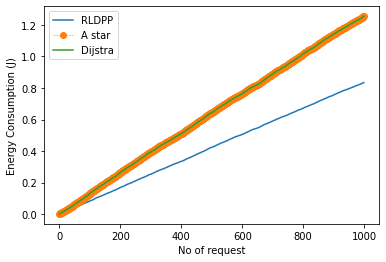

In [ ]:
import matplotlib.pyplot as plt
plt.plot(EMethod20, label='RLDPP')
plt.plot(EAstar20, 'o',linestyle='dashed',linewidth=0.5, label='A star ')
plt.plot(EDijstra20, label='Dijstra')
#plt.xlim(0, 150)
plt.xlabel('No of request')
plt.ylabel('Energy Consumption (J)')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/Networkx/Energy20.png')
plt.show()

Graph of Energy Consumption for 25 nodes

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
Astar25E = AstarEnergy(G25)

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
Dijstra25E = DijstraEnergy(G25)

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
Method25E = NewEnergy(G25)

In [ ]:
EAstar25 = np.cumsum(Astar25E[3])
EDijstra25 = np.cumsum(Dijstra25E[3])
EMethod25 = np.cumsum(Method25E[3])

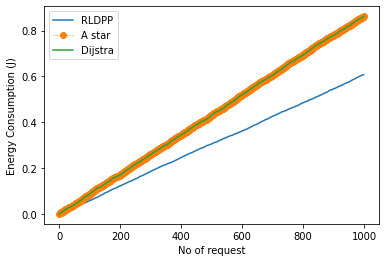

In [ ]:
import matplotlib.pyplot as plt
plt.plot(EMethod25, label='RLDPP')
plt.plot(EAstar25, 'o',linestyle='dashed',linewidth=0.5, label='A star ')
plt.plot(EDijstra25, label='Dijstra')
#plt.xlim(0, 80)
plt.xlabel('No of request')
plt.ylabel('Energy Consumption (J)')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/Networkx/Energy25.png')
plt.show()

Graph of Energy Consumption for 30 nodes

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
Astar30E = AstarEnergy(G30)

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
Dijstra30E = DijstraEnergy(G30)

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
Method30E = NewEnergy(G30)

In [ ]:
EAstar30 = np.cumsum(Astar30E[3])
EDijstra30 = np.cumsum(Dijstra30E[3])
EMethod30 = np.cumsum(Method30E[3])

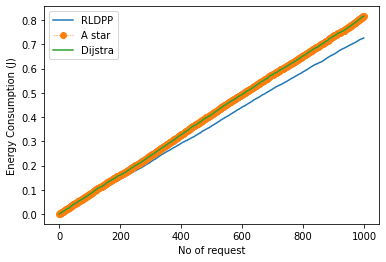

In [ ]:
import matplotlib.pyplot as plt
plt.plot(EMethod30, label='RLDPP')
plt.plot(EAstar30, 'o',linestyle='dashed',linewidth=0.5, label='A star ')
plt.plot(EDijstra30, label='Dijstra')
#plt.xlim(0, 150)
plt.xlabel('No of request')
plt.ylabel('Energy Consumption (J)')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/Networkx/Energy30.png')
plt.show()

Network Topology of the differents graphs used

#### Statistical Analysis

First Graph(20 nodes)

In [ ]:
G20 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph20.gml')

In [ ]:
N20 = len(G20.nodes())
N20

20

In [ ]:
L20 = len(G20.edges())
L20

55

In [ ]:
delta20 = nx.diameter(G20)
delta20

3

In [ ]:
Avgdeg20 = sum(dict(G20.degree()).values())/float(len(G20))
Avgdeg20

5.5

In [ ]:
deg = sorted(dict(G20.degree()).values())
deg
Maxdeg20 = max(deg)
Mindeg20 = min(deg)

In [ ]:
print(Maxdeg20, Mindeg20)

11 3


In [ ]:
AvgLink = nx.average_shortest_path_length(G20, weight='weigth')
AvgLink

1.8631578947368421

Second Graph(25 nodes)

In [ ]:
#nx.write_gml(G25, "/content/gdrive/MyDrive/Networkx/Graph25.gml")

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
N25 = len(G25.nodes())
N25

25

In [ ]:
L25 = len(G25.edges())
L25

83

In [ ]:
delta25 = nx.diameter(G25)
delta25

3

In [ ]:
Avgdeg25 = sum(dict(G25.degree()).values())/float(len(G25))
Avgdeg25

6.64

In [ ]:
deg25 = sorted(dict(G25.degree()).values())
Maxdeg25 = max(deg25)
Mindeg25 = min(deg25)

In [ ]:
print(Maxdeg25, Mindeg25)

12 3


In [ ]:
AvgLink25 = nx.average_shortest_path_length(G25, weight='weigth')
AvgLink25

1.8166666666666667

Third Graph (30 nodes)

In [ ]:
# nx.write_gml(G30, "/content/gdrive/MyDrive/Networkx/Graph30.gml")

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
N30 = len(G30.nodes())
N30

30

In [ ]:
L30 = len(G30.edges())
L30

125

In [ ]:
delta30 = nx.diameter(G30)
delta30

3

In [ ]:
Avgdeg30 = sum(dict(G30.degree()).values())/float(len(G30))
Avgdeg30

8.333333333333334

In [ ]:
deg30 = sorted(dict(G30.degree()).values())
Maxdeg30 = max(deg30)
Mindeg30 = min(deg30)

In [ ]:
print(Maxdeg30, Mindeg30)

15 3


In [ ]:
AvgLink30 = nx.average_shortest_path_length(G30, weight='weigth')
AvgLink30

1.7770114942528736

#### Statistical Analysis Part 2

##### Analysis for 20 nodes

In [ ]:
MeanAstar20 = Astar20E[4]
StdAstar20 = Astar20E[5]
PearsonAstar20 = Astar20E[6]

In [ ]:
MeanAstar20

0.0007542953999999999

In [ ]:
StdAstar20

0.0003127853884791296

In [ ]:
PearsonAstar20

41.467227359351476

In [ ]:
MeanDijstra20 = Dijstra20E[4]
StdDijstra20 = Dijstra20E[5]
PearsonDijstra20 = Dijstra20E[6]

In [ ]:
MeanDijstra20 

0.0007542953999999999

In [ ]:
StdDijstra20

0.0003127853884791296

In [ ]:
PearsonDijstra20

41.467227359351476

In [ ]:
MeanNew20 = Method20E[4]
StdNew20 = Method20E[5]
PearsonNew20 = Method20E[6]

In [ ]:
MeanNew20

0.0010780019427832001

In [ ]:
StdNew20

0.0003516022336481651

In [ ]:
PearsonNew20

32.61610389498869

##### Analysis for 25 nodes

In [ ]:
G20 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph21.gml')

In [ ]:
G25 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph25.gml')

In [ ]:
G30 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph30.gml')

In [ ]:
G35 = nx.read_gml('/content/gdrive/MyDrive/Networkx/Graph35.gml')

In [ ]:
MeanAstar25 = Astar25E[4]
StdAstar25 = Astar25E[5]
PearsonAstar25 = Astar25E[6]

In [ ]:
MeanAstar25

0.00086230848

In [ ]:
StdAstar25

0.0004268583998752861

In [ ]:
PearsonAstar25

49.50182095800404

In [ ]:
MeanDijstra25 = Dijstra25E[4]
StdDijstra25 = Dijstra25E[5]
PearsonDijstra25 = Dijstra25E[6]

In [ ]:
MeanDijstra25

0.00086230848

In [ ]:
StdDijstra25

0.0004268583998752861

In [ ]:
PearsonDijstra25

49.50182095800404

In [ ]:
MeanNew25 = Method25E[4]
StdNew25 = Method25E[5]
PearsonNew25 = Method25E[6]

In [ ]:
MeanNew25

0.00060763704

In [ ]:
StdNew25

0.0002627157663012222

In [ ]:
PearsonNew25

43.23564052336609

##### Analysis for 30 nodes

In [ ]:
MeanAstar30 = Astar30E[4]
StdAstar30 = Astar30E[5]
PearsonAstar30 = Astar30E[6]

In [ ]:
MeanAstar30

0.00081620208

In [ ]:
StdAstar30

0.00038466793935402734

In [ ]:
PearsonAstar30

47.12900748231704

In [ ]:
MeanDijstra30 = Dijstra30E[4]
StdDijstra30 = Dijstra30E[5]
PearsonDijstra30 = Dijstra30E[6]

In [ ]:
MeanDijstra30 

0.00081620208

In [ ]:
StdDijstra30

0.00038466793935402734

In [ ]:
PearsonDijstra30

47.12900748231704

In [ ]:
MeanNew30 = Method30E[4]
StdNew30 = Method30E[5]
PearsonNew30 = Method30E[6]

In [ ]:
MeanNew30

0.0007263952

In [ ]:
StdNew30

0.00025753918183794866

In [ ]:
PearsonNew30

35.454416802031275